In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as  plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


categorical value
1- SEX
2-SMOKER
3-REGION

Checking for nul value


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

As per dataset no null value found

In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [10]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

<Axes: >

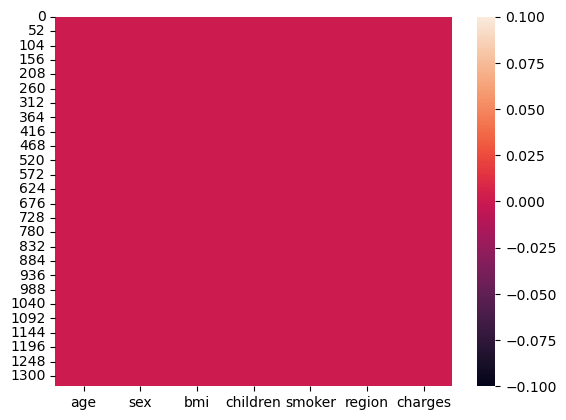

In [11]:
sns.heatmap(df.isnull())

Now start distribution of data

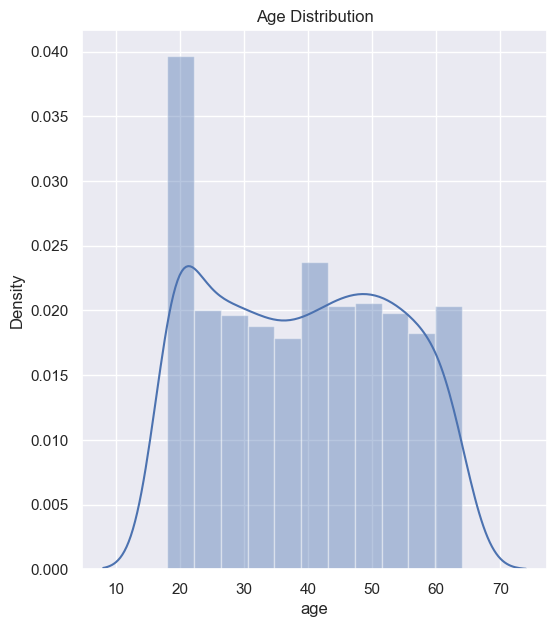

In [12]:
sns.set()
plt.figure(figsize=(6,7))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

As per above distplot found that age 20 to 21 have more density.

Now i am going to distribute one more column name sex

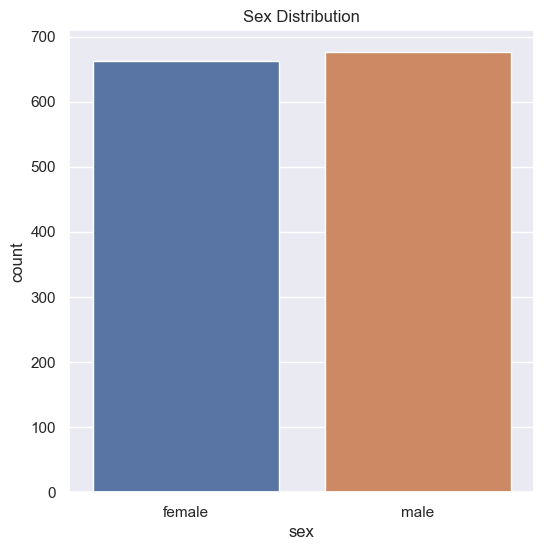

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data =df)
plt.title('Sex Distribution')
plt.show()

as per my analysis thre is no too much difference between male and female.

In [14]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

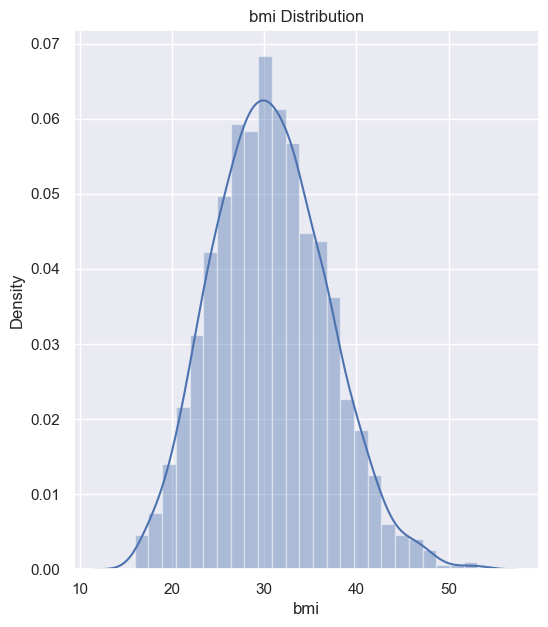

In [15]:
plt.figure(figsize=(6,7))
sns.distplot(df['bmi'])
plt.title('bmi Distribution')
plt.show()

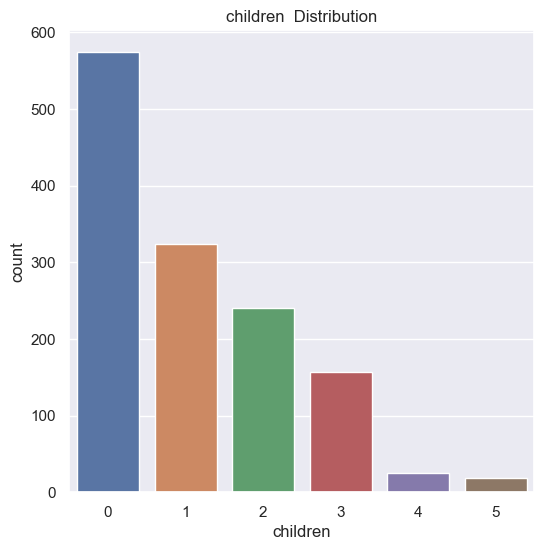

In [16]:
plt.figure(figsize=(6,6))
sns.countplot(x ='children', data =df)
plt.title('children  Distribution')
plt.show()

In [17]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

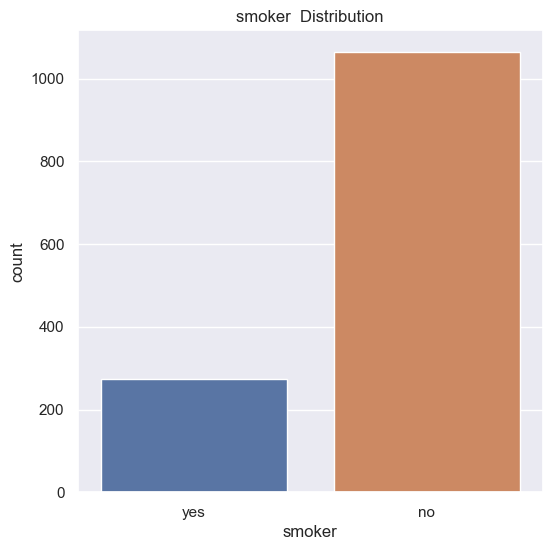

In [18]:
plt.figure(figsize=(6,6))
sns.countplot(x ='smoker', data =df)
plt.title('smoker  Distribution')
plt.show()

In [19]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

abbove dataset we have a 1064 non smoker and 274 smoker

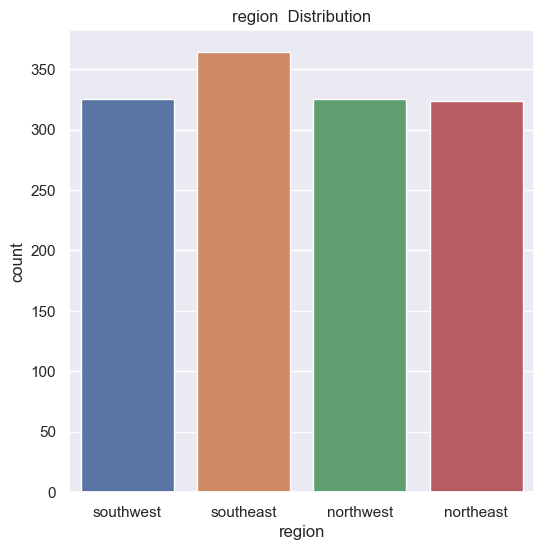

In [20]:
plt.figure(figsize=(6,6))
sns.countplot(x ='region', data =df)
plt.title('region  Distribution')
plt.show()

In [21]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

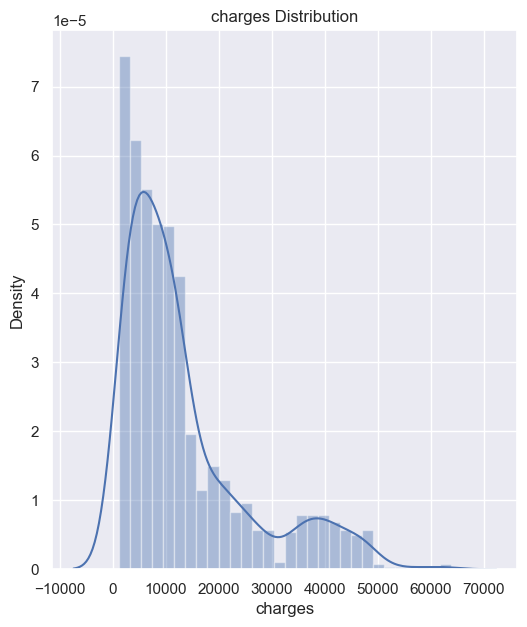

In [22]:
plt.figure(figsize=(6,7))
sns.distplot(df['charges'])
plt.title('charges Distribution')
plt.show()

as per above dataset found that mostly density on $10000.

after distributiing all the column we need to convert all cotegorical column to int and assign some value

In [23]:
df.replace({'sex':{'male':0,'female':1}}, inplace=True)
df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
df.replace({'region':{'southeast':0,'southwest':1, 'northeast':2,'northwest':3}}, inplace=True)

In [24]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


drop the target variable

In [27]:
 X = df.drop(columns = 'charges', axis=1)
 Y = df['charges']

In [28]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [29]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Now split data into training and testing

In [43]:
 X_train, X_test ,Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=2)


In [44]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [45]:
reg = LinearRegression()

In [46]:
reg.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

Training data

In [47]:
td_prediction = reg.predict(X_train)

predict r2 value

In [48]:
r2_train = metrics.r2_score(Y_train, td_prediction)
print('R Squared value : ', r2_train)

R Squared value :  0.751505643411174


TEST DATA PREDECTION

In [49]:
test_prediction = reg.predict(X_test)

In [50]:
r2_test = metrics.r2_score(Y_test, test_prediction)
print('R Squared value : ', r2_test)

R Squared value :  0.7447273869684077


I dont see overfitting issue becoz both training and test data are almost same

In [ ]:
Predecting a cost 

input_data = (31,female,25.74,0,no,southeast) Put the numercial value for categorical column 

In [52]:
input_data = (31,1,25.74,0,1,0)
input_data_as_numpy_array = np.asarray(input_data)

Now i will reshape

In [56]:
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)  I HAVE TAKEN ONLY 1 VALUE TO PREDICT

In [57]:
prediction = reg.predict(input_data_reshape)
print(prediction)

[3760.0805765]


In [ ]:
df.describe()